# HomeWork 14
**DeadLine : 23:59 12 Day 1399**

**Total points : 100pts**

Import some prerequisites:

In [2]:
import os
import cv2
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Model

## Downloading data
Please follow steps 1 through 5 carefully. If the steps are done correctly, there is no need to repeat the steps to reuse the notebook.

### Step 1: mount your drive
First, mount your drive on this notebook. After running the next cell, you can see your google drive directory in Files, the left side of this page.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 2: Get the API key from your kaggle account

Visit www.kaggle.com ⇨ login ⇨ My Account ⇨ Create New API Token

The “kaggle.json” file will be auto downloaded.

### Step 3: Upload the kaggle.json file
Run next cell and upload `kaggle.json` file

In [3]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarakodeiri","key":"b2e781811afa644cfd8f681ff2c89320"}'}

The below will create the necessary folder path.

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


### Step 4: Download cars dataset

In [5]:
os.chdir('/content/drive/MyDrive/')
os.makedirs('stanford_car_dataset')
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder  -p /content/drive/MyDrive/stanford_car_dataset/

100% 1.83G/1.83G [00:16<00:00, 30.5MB/s]



### Step 5: unzip dataset

In [4]:
# os.chdir('/content/drive/MyDrive/stanford_car_dataset/')
os.chdir('/content/')
#!unzip stanford-car-dataset-by-classes-folder.zip

## set hyperparameters
please define and set hyperparameters.

In [5]:
IMG_WIDTH, IMG_HEIGHT = 244, 244
EPOCHS = 30
BATCH_SIZE= 80
n_classes = 196

In [6]:
!gdown --id 1-0oYeZgeCrpR1iAgjcs5zEbt6Oj5tK7m

Downloading...
From: https://drive.google.com/uc?id=1-0oYeZgeCrpR1iAgjcs5zEbt6Oj5tK7m
To: /content/stanford-car-dataset-by-classes-folder.zip
1.96GB [00:15, 125MB/s] 


In [7]:
!unzip stanford-car-dataset-by-classes-folder.zip


Streaming output truncated to the last 5000 lines.
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04381.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04688.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/04772.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05544.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05728.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/05860.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06146.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06157.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06332.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06441.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06447.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06590.jpg  
  inflating: car_data/car_data/train/Chrysler Aspen SUV 2009/06650.jpg  


In [8]:
# BASE_PATH = '/content/drive/MyDrive/stanford_car_dataset/'
BASE_PATH = '/content/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'car_data/car_data/train')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'car_data/car_data/test')

## An example from dataset

(768, 1024, 3)


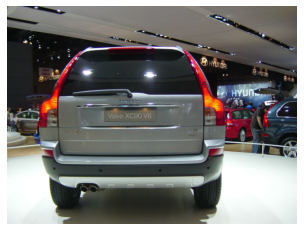

In [9]:
image = mpimg.imread(os.path.join(DATA_TRAIN_PATH, 'Volvo XC90 SUV 2007/00286.jpg'))
print(image.shape)
plt.imshow(image)
plt.axis('off')
plt.show()

## Create generator

In this step, we will use the Keras `ImageDataGenerator` methods for loading and transform the images of the dataset. With these methods, we don't need to load the entire image dataset in memory.

In [10]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_datagen_aug = ImageDataGenerator(rotation_range=40,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode="nearest",
                                       preprocessing_function= preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# train_datagen = None
# train_datagen_aug = None
# test_datagen = None

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH, class_mode="categorical",
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE)
train_generator_aug  = train_datagen_aug.flow_from_directory(DATA_TRAIN_PATH, class_mode="categorical",
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE)
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH, class_mode="categorical",
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE)

Found 8144 images belonging to 196 classes.
Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [11]:
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

## Part A: build and train model without using data augmentation

In [19]:
def build_model():
  model = ResNet50(weights=None, pooling = 'avg', classes=196)
  # model.summary()
  return model

In [40]:
modelA = build_model()
modelA.compile(loss= loss, optimizer='Nadam', metrics=['accuracy'])
modelA.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/30
102/102 [==============================] - 101s 844ms/step - loss: 6.1045 - accuracy: 0.0076
Epoch 2/30
102/102 [==============================] - 85s 834ms/step - loss: 5.3215 - accuracy: 0.0059
Epoch 3/30
102/102 [==============================] - 85s 827ms/step - loss: 5.1312 - accuracy: 0.0158
Epoch 4/30
102/102 [==============================] - 84s 823ms/step - loss: 5.0135 - accuracy: 0.0246
Epoch 5/30
102/102 [==============================] - 84s 822ms/step - loss: 4.8459 - accuracy: 0.0351
Epoch 6/30
102/102 [==============================] - 84s 823ms/step - loss: 4.6409 - accuracy: 0.0477
Epoch 7/30
102/102 [==============================] - 84s 822ms/step - loss: 4.5377 - accuracy: 0.0604
Epoch 8/30
102/102 [==============================] - 84s 824ms/step - loss: 4.2116 - accuracy: 0.0889
Epoch 9/30
102/102 [==============================] - 85s 828ms/step - loss: 3.9036 - accuracy: 0.1138
Epoch 10/30
102/102 [==============================] - 85s 825ms/step - 

In [41]:
#modelA.save('content/drive/MyDrive/modelA.h5')
modelA.evaluate(test_generator, batch_size=BATCH_SIZE)

101/101 [==============================] - 70s 679ms/step - loss: 6.4001 - accuracy: 0.2022


[6.400067329406738, 0.20221365988254547]

## Part B: train model using data augmentation

In [42]:
modelB = build_model()
modelB.compile(loss= loss, optimizer = 'Nadam', metrics=['accuracy'])
modelB.fit(train_generator_aug, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/30
102/102 [==============================] - 184s 2s/step - loss: 5.9826 - accuracy: 0.0075
Epoch 2/30
102/102 [==============================] - 175s 2s/step - loss: 5.2789 - accuracy: 0.0083
Epoch 3/30
102/102 [==============================] - 171s 2s/step - loss: 5.1555 - accuracy: 0.0175
Epoch 4/30
102/102 [==============================] - 172s 2s/step - loss: 5.0731 - accuracy: 0.0217
Epoch 5/30
102/102 [==============================] - 174s 2s/step - loss: 4.9882 - accuracy: 0.0276
Epoch 6/30
102/102 [==============================] - 173s 2s/step - loss: 4.9290 - accuracy: 0.0304
Epoch 7/30
102/102 [==============================] - 175s 2s/step - loss: 4.8322 - accuracy: 0.0405
Epoch 8/30
102/102 [==============================] - 175s 2s/step - loss: 4.6804 - accuracy: 0.0471
Epoch 9/30
102/102 [==============================] - 176s 2s/step - loss: 4.5844 - accuracy: 0.0500
Epoch 10/30
102/102 [==============================] - 170s 2s/step - loss: 4.3994 - accura

In [44]:
# modelB.save('content/drive/MyDrive/modelB.h5')
modelB.evaluate(test_generator, batch_size=BATCH_SIZE)

101/101 [==============================] - 73s 717ms/step - loss: 3.8122 - accuracy: 0.2365


[3.812196731567383, 0.23653773963451385]

## Part C: build and train model using data augmentation and pretrained resnet50

In [12]:
def build_model_with_resnet50(fine_tuning = False):

  # model = Sequential()


  # model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
  # # x = model.output
  # # model.add(keras.layers.GlobalAveragePooling2D()(x))
  # model.add(Dense(1024, activation = 'softmax'))
  # model.add(Dense(n_classes, activation = 'softmax'))

  base_model = ResNet50(include_top = False, weights = 'imagenet')
  x = base_model.output
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = Dense(1024, activation='relu')(x)
  predictions = Dense(196, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=predictions)

  # Say not to train first layer (ResNet) model as it is already trained
  model.layers[0].trainable = fine_tuning
  
  # res_model = ResNet50(include_top=False, weights="imagenet")
    
  # if (not fine_tuning):  
  #   for layer in res_model.layers:
  #       layer.trainable = False

  # for i, layer in enumerate(res_model.layers):
  #     print(i, layer.name, "-", layer.trainable)

  # model = Sequential()
  # model.add(res_model)
  # model.add(Dense(n_classes, activation = 'softmax'))
  return model

In [48]:
modelC = build_model_with_resnet50(fine_tuning = False)
modelC.compile(loss= loss, optimizer = optimizer, metrics=['accuracy'])
modelC.fit(train_generator_aug, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/30
102/102 [==============================] - 184s 2s/step - loss: 5.0593 - accuracy: 0.0437
Epoch 2/30
102/102 [==============================] - 179s 2s/step - loss: 2.6157 - accuracy: 0.3788
Epoch 3/30
102/102 [==============================] - 179s 2s/step - loss: 1.3244 - accuracy: 0.6517
Epoch 4/30
102/102 [==============================] - 180s 2s/step - loss: 0.8202 - accuracy: 0.7783
Epoch 5/30
102/102 [==============================] - 181s 2s/step - loss: 0.5406 - accuracy: 0.8495
Epoch 6/30
102/102 [==============================] - 182s 2s/step - loss: 0.3792 - accuracy: 0.8977
Epoch 7/30
102/102 [==============================] - 182s 2s/step - loss: 0.2920 - accuracy: 0.9254
Epoch 8/30
102/102 [==============================] - 182s 2s/step - loss: 0.2321 - accuracy: 0.9371
Epoch 9/30
102/102 [==============================] - 179s 2s/step - loss: 0.1818 - accuracy: 0.9529
Epoch 10/30
102/102 [==============================] - 177s 2s/step - loss: 0.1663 - accura

In [49]:
# modelC.save('content/drive/MyDrive/modelC.h5')
modelC.evaluate(test_generator, batch_size=BATCH_SIZE)

101/101 [==============================] - 77s 758ms/step - loss: 1.1985 - accuracy: 0.7487


[1.1984869241714478, 0.7486631274223328]

In [13]:
modelD = build_model_with_resnet50(fine_tuning = True)
modelD.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
modelD.fit(train_generator_aug, epochs=EPOCHS, batch_size=BATCH_SIZE)

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/30
102/102 [==============================] - 198s 2s/step - loss: 5.2182 - accuracy: 0.0282
Epoch 2/30
102/102 [==============================] - 188s 2s/step - loss: 3.2399 - accuracy: 0.2961
Epoch 3/30
102/102 [==============================] - 187s 2s/step - loss: 1.6609 - accuracy: 0.5913
Epoch 4/30
102/102 [==============================] - 185s 2s/step - loss: 0.9762 - accuracy: 0.7533
Epoch 5/30
102/102 [==============================] - 186s 2s/step - loss: 0.6425 - accuracy: 0.8281
Epoch 6/30
102/102 [==============================] - 188s 2s/step - loss: 0.4358 - accuracy: 0.8870
Epoch 7/30
102/102 [==============================] - 186s 2s/step - loss: 0.3271 - accuracy: 0.9125
Epoch 8/30
102/102 [==============================] - 187s 2s/step - loss: 0.2339 - accuracy: 0.9379
Epoch 9/30
102/102 [==============================] - 186s 2s/step - loss: 0.1783 - accuracy: 0.9567
Epoch 10/30
102/102 [=====

In [14]:
# modelD.save('content/drive/MyDrive/modelD.h5')
modelD.evaluate(test_generator, batch_size=BATCH_SIZE)

101/101 [==============================] - 75s 738ms/step - loss: 1.2501 - accuracy: 0.7296


[1.2501486539840698, 0.7296355962753296]